In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100,
          copy=True,
          whiten=False, # removes relative variance scales for our components
          svd_solver='auto', # solver to use for svd
          tol='auto', # only relevant for arpack svd solver
          iterated_power='auto', # only relevant for randomized svd solver
          random_state=0 # only relevant for arpack or randomized svd solver
         )
X_train_transf = pca.fit_transform(X_train)
X_test_transf = pca.transform(X_test)

In [3]:
print(pca.components_.shape) # principal components
print(pca.explained_variance_.shape) # explained variance of each component
print(pca.explained_variance_ratio_.shape) # explained variance ratio of each component
print(pca.mean_) # mean of dataset before centering

(100, 784)
(100,)
(100,)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.25000000e-03 8.39285714e-03 3.85714286e-03 1.60714286e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.21428571e-04 1.26428571e-02 2.26250000e-02
 4.11071429e-02 6.08928571e-02 1.29196429e-01 1.83625000e-01
 2.05178571e-01 1.92142857e-01 2.10267857e-01 1.92625000e-01
 1.76428571e-01 1.37785714e-01 1.00767857e-01 7.18035714e-02
 4.84285714e-02 1.27321429e-02 7.89285714e-03 3.78571429e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14285714e-03 7.50000000e-04
 6.41071429e-03 1.25000000e-02 6.67500000e-02 1.36089286e-01

total explained variance: 0.915


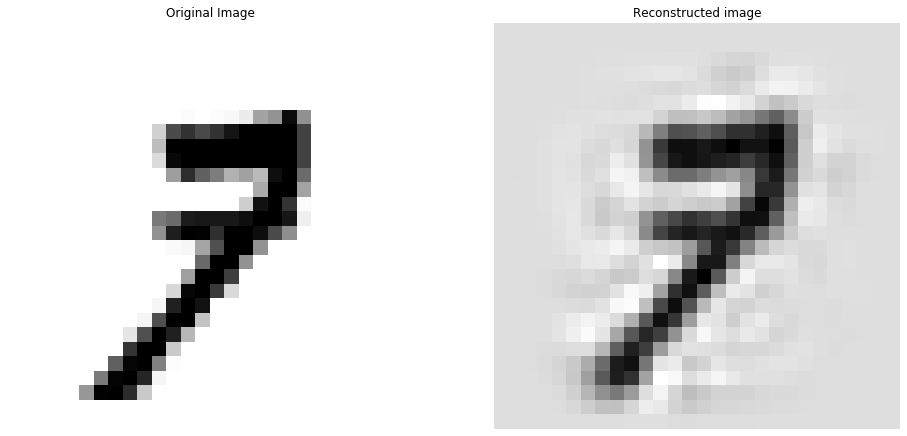

In [4]:
print('total explained variance:',round(np.cumsum(pca.explained_variance_ratio_)[-1],3))
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
plt.imshow(X_train.astype(float).values[0].reshape(28,28),cmap=plt.get_cmap('gray_r'))
plt.title('Original Image')
plt.axis('off')
ax = fig.add_subplot(122)
X_rec = pca.inverse_transform(X_train_transf)
plt.imshow(X_rec[0].reshape(28,-1),cmap=plt.get_cmap('gray_r'))
plt.title('Reconstructed image')
plt.axis('off')
plt.show()

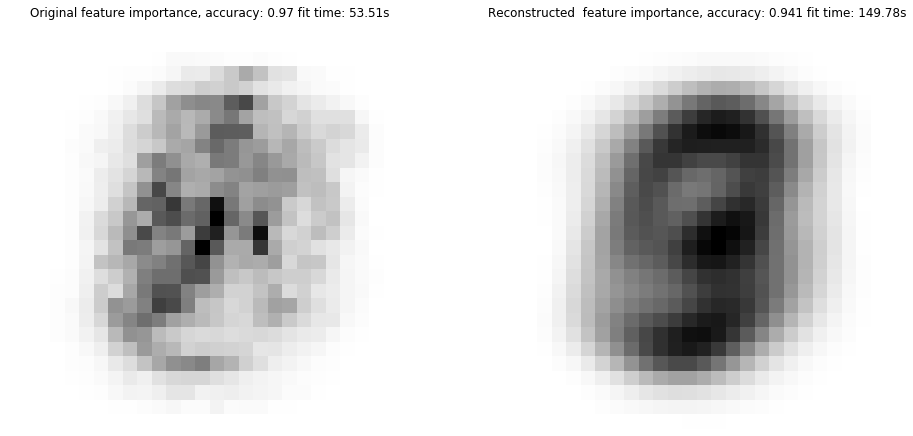

In [5]:
from sklearn.ensemble import RandomForestClassifier
import time

def transformData(X_train, X_test, method):
    X_train_transf = method.fit_transform(X_train)
    X_test_transf = method.transform(X_test)
    return X_train_transf, X_test_transf, method

def fitAndVisualize(X_train, y_train, X_test, y_test, X_train_transf, X_test_transf, pca):
    rf_clf = RandomForestClassifier(random_state=0)
    rc_clf_red = RandomForestClassifier(random_state=0)

    start = time.time()
    rf_clf.fit(X_train, y_train)
    rcFit = time.time()-start

    start = time.time()
    rc_clf_red.fit(X_train_transf, y_train)
    rcRedFit = time.time()-start

    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(121)
    plt.imshow(rf_clf.feature_importances_.reshape(28,28),cmap=plt.get_cmap('gray_r'))
    plt.title('Original feature importance, accuracy: ' + 
              str(round(rf_clf.score(X_test,y_test),3)) + 
              ' fit time: '+str(round(rcFit,2)) + 's'
             )
    plt.axis('off')
    ax = fig.add_subplot(122)
    rc_clf_feat_rec = pca.inverse_transform(rc_clf_red.feature_importances_)
    plt.imshow(rc_clf_feat_rec.reshape(28,-1),cmap=plt.get_cmap('gray_r'))
    plt.title('Reconstructed  feature importance, accuracy: ' + 
              str(round(rc_clf_red.score(X_test_transf,y_test),3)) + 
              ' fit time: '+str(round(rcRedFit,2)) + 's'
             )
    plt.axis('off')
    plt.show()
    
X_train_transf, X_test_transf, method = transformData(X_train, X_test, PCA(n_components=.99))
fitAndVisualize(X_train, y_train, X_test, y_test, X_train_transf, X_test_transf, method)

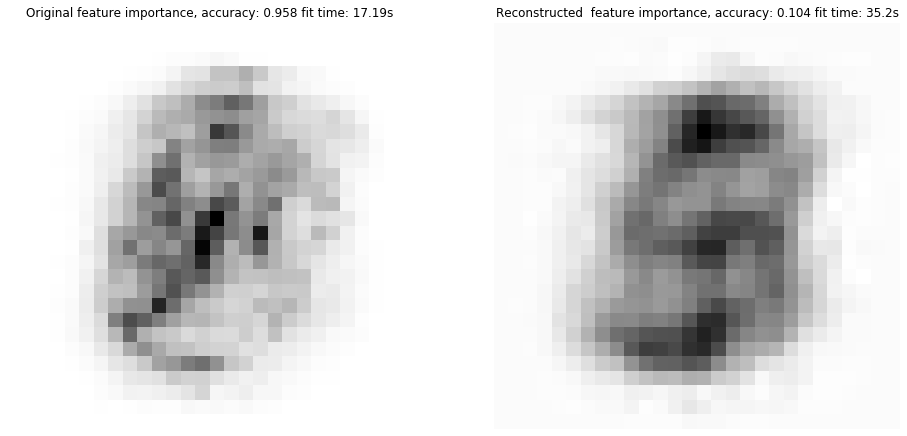

In [13]:
def fitAndVisualize(X_train, y_train, X_test, y_test, X_train_transf, X_test_transf, pca):
    rf_clf = RandomForestClassifier(random_state=0)
    rc_clf_red = RandomForestClassifier(random_state=0)

    start = time.time()
    rf_clf.fit(X_train, y_train)
    rcFit = time.time()-start

    start = time.time()
    rc_clf_red.fit(X_train_transf, y_train)
    rcRedFit = time.time()-start

    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(121)
    plt.imshow(rf_clf.feature_importances_.reshape(28,28),cmap=plt.get_cmap('gray_r'))
    plt.title('Original feature importance, accuracy: ' + 
              str(round(rf_clf.score(X_test,y_test),3)) + 
              ' fit time: '+str(round(rcFit,2)) + 's'
             )
    plt.axis('off')
    ax = fig.add_subplot(122)
    rc_clf_feat_rec = pca.inverse_transform(rc_clf_red.feature_importances_.reshape(1,-1))
                                            # invsere transform here requires 2D matrix input, using (1,-1)
                                            # since we have one sample
    plt.imshow(rc_clf_feat_rec.reshape(28,-1),cmap=plt.get_cmap('gray_r'))
    plt.title('Reconstructed  feature importance, accuracy: ' + 
              str(round(rc_clf_red.score(X_test_transf,y_test),3)) + 
              ' fit time: '+str(round(rcRedFit,2)) + 's'
             )
    plt.axis('off')
    plt.show()

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=100, # no float option here
                 kernel='linear',
                 fit_inverse_transform=False,
                 eigen_solver='auto',
                 tol=0, # tolerance for arpack, 0 takes optimal values
                 max_iter=0, # specific to arpack
                 remove_zero_eig=False,
                 random_state=0, # for arpack solver
                 copy_X=True,
                 n_jobs=2
                 # additional parameters specific to the kernel
                )

#kpca.lambas_ # eigenvalues
#kpca.alphas_ # eigenvectors
#kpca.inverse_transform(New_Feature_Data) # only possible when we fit_inverse_transform
                                          # since we need to store the original location of potentially projected
                                          # points to have approximate locationsto maps back to
X_train_transf, X_test_transf, method = transformData(X_train.astype(int).iloc[:15000],
                                                      X_test.astype(int),
                                                      KernelPCA(n_components=100,
                                                                kernel='rbf',
                                                                gamma=20,
                                                                fit_inverse_transform=True,
                                                                n_jobs=3
                                                               )
                                                     )
fitAndVisualize(X_train.iloc[:15000],
                y_train.iloc[:15000],
                X_test,
                y_test,
                X_train_transf,
                X_test_transf,
                method)

In [6]:
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

pca = PCA(n_components=8)

data = load_boston()
data.keys()

X, y = data["data"], data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipe = Pipeline([('std_scl',StandardScaler()),
                 ('pca',PCA(n_components=8))
                ])
X_train_transf = pipe.fit_transform(X_train)
X_test_transf = pipe.transform(X_test)

In [22]:
print('total explained variance:',round(np.cumsum(pipe.named_steps['pca'].explained_variance_ratio_)[-1],3))

ridge = Ridge()
ridge_red = Ridge()
ridge.fit(X_train, y_train)
ridge_red.fit(X_train_transf, y_train)

print('standard ridge score:', round(ridge.score(X_test, y_test),3))
print('Dim. red. ridge score:', round(ridge_red.score(X_test_transf, y_test),3))

total explained variance: 0.931
standard ridge score: 0.58
Dim. red. ridge score: 0.512


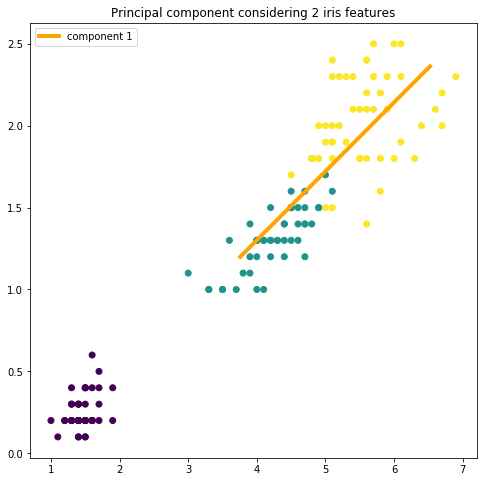

In [27]:
# visualizing principal components
from sklearn.datasets import load_iris
import numpy as np
irisData = load_iris()
X, y = irisData["data"], irisData["target"]
pca = PCA()
X_transf = pca.fit_transform(X[:, 2:])
plt.figure(figsize=(8,8))
plt.scatter(X[:, 2], X[:, 3],c=y)
plt.plot([pca.mean_[0], pca.mean_[0] + 3*pca.components_[0,0]],
         [pca.mean_[1], pca.mean_[1] + 3*pca.components_[0,1]],
         linewidth=4,
         color='orange',
         label='component 1'
        )
plt.legend()
plt.title('Principal component considering 2 iris features')
plt.show()